In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [13]:
#getting the data
ford_df = pd.read_csv('Ford_Stock.csv')
GM_df = pd.read_csv('GM_Stock.csv')
tesla_df = pd.read_csv('Tesla_Stock.csv')

In [11]:
tesla_df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [12]:
#Visualizing the data

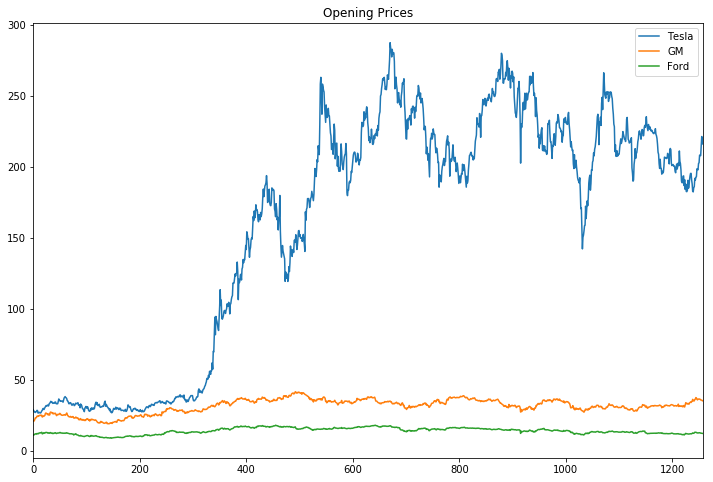

In [37]:
tesla_df['Open'].plot(label='Tesla',figsize=(12,8),title='Opening Prices')
GM_df['Open'].plot(label='GM')
ford_df['Open'].plot(label='Ford')
plt.legend()

In [20]:
#plotting the volume of stock traded each day

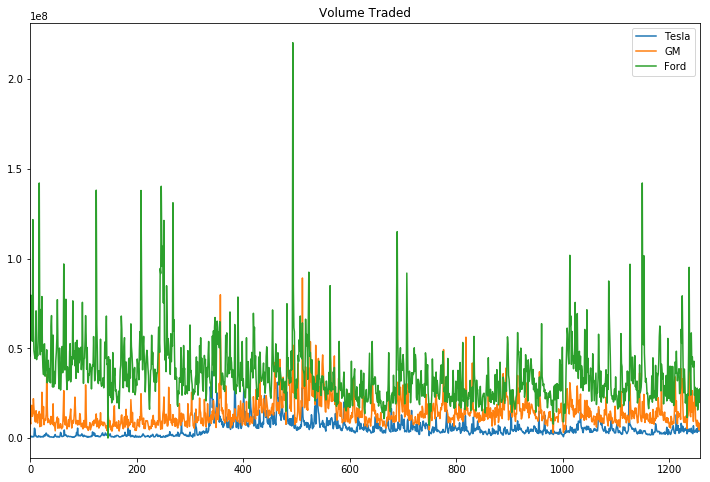

In [22]:
tesla_df['Volume'].plot(label='Tesla',figsize=(12,8),title='Volume Traded')
GM_df['Volume'].plot(label='GM')
ford_df['Volume'].plot(label='Ford')
plt.legend()

In [43]:
ford_df['Volume'].max()

220362796

In [ ]:
#creating a new column for each datafram called 'total traded'

In [45]:
tesla_df['Total Traded'] = tesla_df['Open']*tesla_df['Volume']
ford_df['Total Traded'] = ford_df['Open']*ford_df['Volume']
GM_df['Total Traded'] = GM_df['Open']*GM_df['Volume']

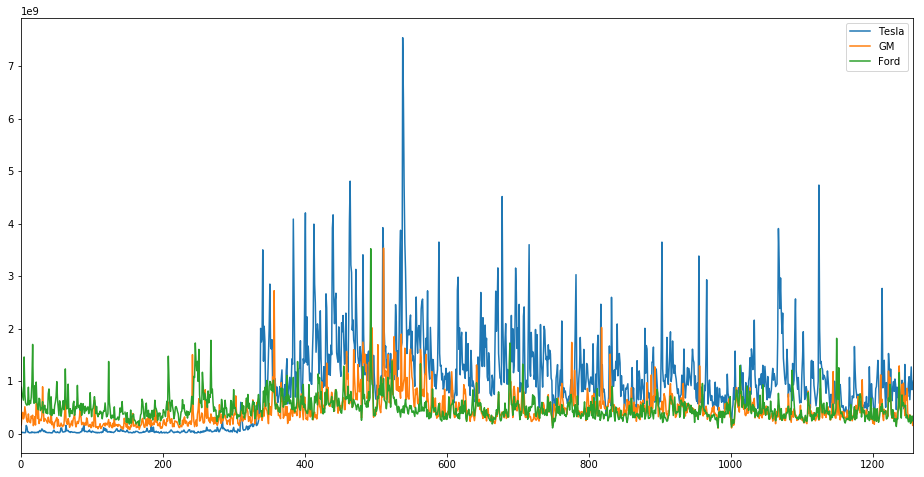

In [47]:
tesla_df['Total Traded'].plot(label='Tesla',figsize=(16,8))
GM_df['Total Traded'].plot(label='GM')
ford_df['Total Traded'].plot(label='Ford')
plt.legend()

In [ ]:
#looking at the relationship between these stocks

In [50]:
from pandas.plotting import scatter_matrix

In [52]:
car_comp = pd.concat([tesla_df["Open"],GM_df['Open'],ford_df['Open']],axis=1)

In [54]:
car_comp.columns = ['Tesla Open', 'GM Open','Ford Open']

In [56]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
0,28.94,20.83,11.00
1,28.21,21.05,11.15
2,27.76,21.10,11.33
3,27.20,22.26,11.74
4,27.00,23.20,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E916C56470>,
      dtype=object)

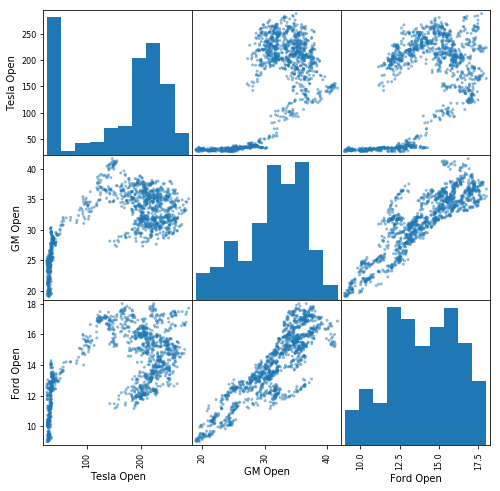

In [58]:
scatter_matrix(car_comp,figsize=(8,8))

In [61]:
#Calculating daily percentage change

In [69]:
tesla_df['returns'] = (tesla_df['Close']/tesla_df['Close'].shift(1) ) - 1
ford_df['returns'] = (ford_df['Close']/ford_df['Close'].shift(1) ) - 1
GM_df['returns'] = (GM_df['Close']/GM_df['Close'].shift(1) ) - 1

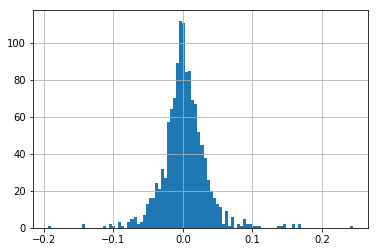

In [67]:
tesla_df['returns'].hist(bins=100)

In [ ]:
#seeing it all stacked together

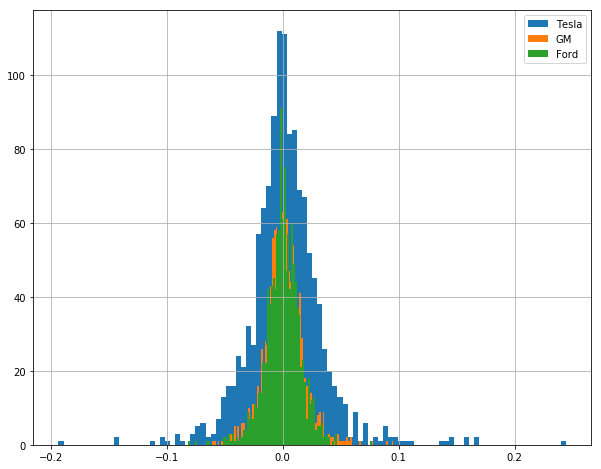

In [71]:
tesla_df['returns'].hist(bins=100,label='Tesla',figsize=(10,8))
GM_df['returns'].hist(bins=100,label='GM',figsize=(10,8))
ford_df['returns'].hist(bins=100,label='Ford',figsize=(10,8))
plt.legend()

In [74]:
#boxplots comparing the returns

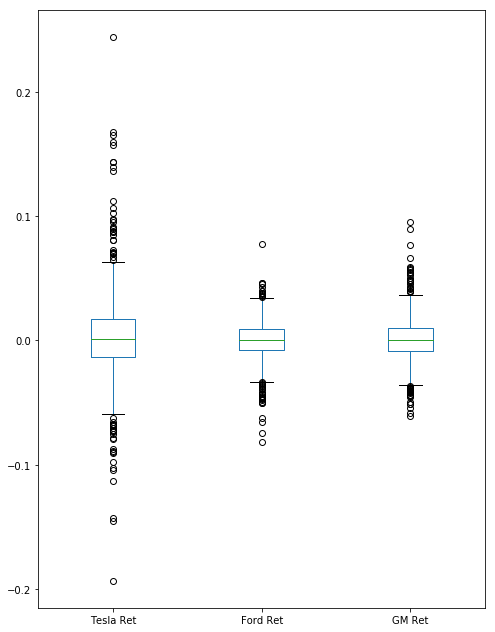

In [78]:
box_df = pd.concat([tesla_df['returns'],ford_df['returns'],GM_df['returns']],axis=1)
box_df.columns = ['Tesla Ret','Ford Ret', 'GM Ret']
box_df.plot(kind='box',figsize=(8,11))

In [79]:
#Comparing daily returns between stocks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E919357D68>,
      dtype=object)

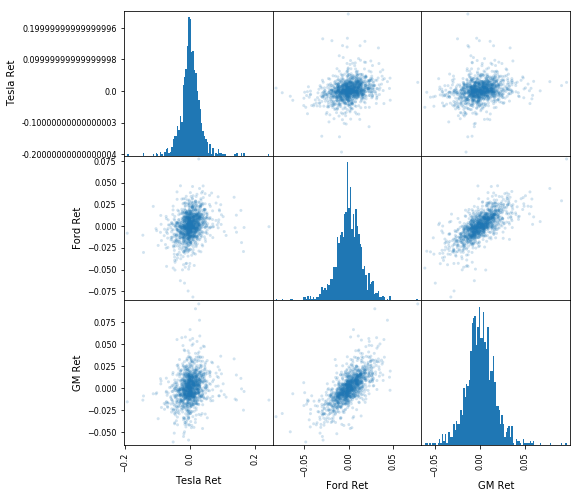

In [81]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100})

In [82]:
#seems like ford and GM have a possible relationship, so the 2 have been plotted together

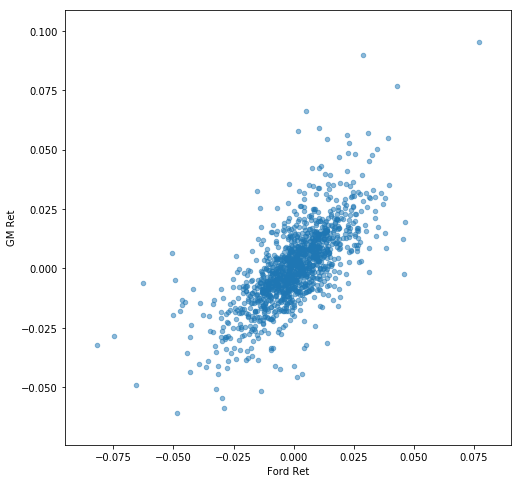

In [85]:
box_df.plot(kind='scatter',x='Ford Ret',y='GM Ret',alpha=0.5,figsize=(8,8))